In [84]:
import numpy as np
import cv2 as cv
import glob
from google.colab.patches import cv2_imshow

In [85]:
chessboardSize = (6,6)
frameSize = (640,480)

In [86]:
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30 , 0.001)

In [87]:
objp = np.zeros((chessboardSize[0]*chessboardSize[1],3),np.float32)
objp[:,:2] = np.mgrid[0:chessboardSize[0],0:chessboardSize[1]].T.reshape(-1,2)

In [88]:
size_of_cb_sq_mm = 20
objp= objp * size_of_cb_sq_mm

In [89]:
objpoints = []
imgpoints = []

In [90]:
link = '/content/drive/MyDrive/Computer vision/WhatsApp Image 2023-12-20 at 17.17.12_9605c69f.jpg'

In [91]:
images = glob.glob(link)

[array([[  0.,   0.,   0.],
       [ 20.,   0.,   0.],
       [ 40.,   0.,   0.],
       [ 60.,   0.,   0.],
       [ 80.,   0.,   0.],
       [100.,   0.,   0.],
       [  0.,  20.,   0.],
       [ 20.,  20.,   0.],
       [ 40.,  20.,   0.],
       [ 60.,  20.,   0.],
       [ 80.,  20.,   0.],
       [100.,  20.,   0.],
       [  0.,  40.,   0.],
       [ 20.,  40.,   0.],
       [ 40.,  40.,   0.],
       [ 60.,  40.,   0.],
       [ 80.,  40.,   0.],
       [100.,  40.,   0.],
       [  0.,  60.,   0.],
       [ 20.,  60.,   0.],
       [ 40.,  60.,   0.],
       [ 60.,  60.,   0.],
       [ 80.,  60.,   0.],
       [100.,  60.,   0.],
       [  0.,  80.,   0.],
       [ 20.,  80.,   0.],
       [ 40.,  80.,   0.],
       [ 60.,  80.,   0.],
       [ 80.,  80.,   0.],
       [100.,  80.,   0.],
       [  0., 100.,   0.],
       [ 20., 100.,   0.],
       [ 40., 100.,   0.],
       [ 60., 100.,   0.],
       [ 80., 100.,   0.],
       [100., 100.,   0.]], dtype=float32)]


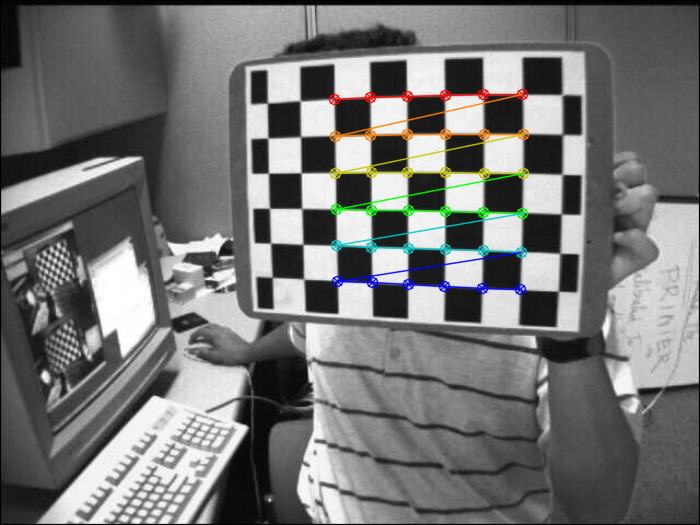

In [92]:
for image in images:
  img = cv.imread(image)
  gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

  ret, corners = cv.findChessboardCorners(gray, chessboardSize, None)
  if ret == True:
    objpoints.append(objp)
    corners2 = cv.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)
    imgpoints.append(corners)
    print(objpoints)
    cv.drawChessboardCorners(img, chessboardSize, corners2, ret)
    cv2_imshow(img)
    cv.waitKey(500)

In [93]:
ret, cameraMatrix,dist,rvecs,tvecs = cv.calibrateCamera(objpoints, imgpoints, frameSize,None,None)
print("cameraMatrix", cameraMatrix)

cameraMatrix [[809.57241267   0.         315.6328521 ]
 [  0.         800.73734484 289.15463181]
 [  0.           0.           1.        ]]
